### Testing the ASSIST integrator and python wrapper

Here we demonstrate the ASSIST ephemeris-quality integrator by calling a python-wrapped C function that has been compiled into a library.  That library is imported with the ephem_forces.py package.

The primary function in ephem_forces is 'integration_function', although we will access it with a higher-level function called 'production_integration_function_wrapper'.  

'integration_function' integrates massless test particles in the field of the Sun, planets, Moon, and 16 massive asteroids.  It also includes the J2, J3, and J4 gravitational harmonics of the Earth, the J2 gravitational harmonic of the Sun, and the solar GR terms (using the PPN formulation).  

The positions of the massive bodies come from two binary files, both from JPL.  The first is for the Sun, planets, and Moon, with the latest DE441 ephemeris. The other is for the asteroids, corresponding to DE441.  

The coordinate frame and units are not flexible, currently.  The coordinate frame is the equatorial ICRF, which is the native coordinate system for the JPL binary files.  Note that this is equatorial rather than ecliptic.  In addition, the native coordinates are barycentric, rather than heliocentric. 

For units we use solar masses, au, and days.  The independent time coordinate is TDB in Julian days.

### To Do

* Write up tests so far, first in a notebook, then transfer to paper
    - Term-by-term tests
    - Out-and-back internal tests (Apophis and Holman)
    - Variational equation tests
    - Close approach tests
    - Divergence tests (Apophis and Holman)
    - Rearranging the terms (DONE)
    - Being more careful with the ephemeris time (DONE)
* Do some speed tests, to compare to Davide's code (DONE)
* Review and edit paper (DONE)
* Finish readthedocs, pipy package, and github site
* Circulate to team (DONE)



In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import ctypes
import importlib

import spiceypy as spice

import pkg_resources
import sys
sys.path.append(r'/Users/mholman/assist')
import assist

jd_ref = spice.j2000()

plt.rc('text', usetex = True)


In [3]:
# This cell defines the initial conditions we have used for the term-by-term comparison with Davide's
# version of JPL's code.
# The dynamical state available on Horizons now will be slightly different because additional
# observations have been incorporated into the orbital solution.
#
# DE441
# (3666) Holman
#2458849.500000000 = A.D. 2020-Jan-01 00:00:00.0000 TDB [del_T=     69.183900 s]
# X = 3.338875350265349E+00 Y =-9.176518267602161E-01 Z =-5.038590677470149E-01
# VX= 2.805663315227095E-03 VY= 7.550408688437705E-03 VZ= 2.980028207454247E-03

# We had used slightly different initial conditions for the term-by-term comparison with
# Davide's code.

#row = [3.338875348598862E+00, -9.176518412197102E-01, -5.038590741719294E-01,
#     2.805663364339457E-03, 7.550408665778840E-03, 2.980028207875623E-03]
# From email with Davide
row = [3.3388753502614090e+00, -9.1765182678903168e-01, -5.0385906775843303e-01,
     2.8056633153049852e-03,  7.5504086883996860e-03,  2.9800282074358684e-03]

In [2]:
for dt in np.arange(100.):
    for i in range(30):
        GMsun, state = assist.all_ephem(i, jd_ref, 2458849.500000000-jd_ref+dt)
        GMsun, state_c = assist.all_ephem_cache(i, jd_ref, 2458849.500000000-jd_ref+dt)
        print(dt, i, np.sum((state-state_c)[0:3]))


0.0 0 0.0
0.0 1 0.0
0.0 2 0.0
0.0 3 0.0
0.0 4 0.0
0.0 5 0.0
0.0 6 0.0
0.0 7 0.0
0.0 8 0.0
0.0 9 0.0
0.0 10 0.0
0.0 11 0.0
0.0 12 0.0
0.0 13 0.0
0.0 14 0.0
0.0 15 0.0
0.0 16 0.0
0.0 17 0.0
0.0 18 0.0
0.0 19 0.0
0.0 20 0.0
0.0 21 0.0
0.0 22 0.0
0.0 23 0.0
0.0 24 0.0
0.0 25 0.0
0.0 26 0.0
0.0 27 0.0
0.0 28 0.0
0.0 29 0.0
1.0 0 0.0
1.0 1 0.0
1.0 2 0.0
1.0 3 0.0
1.0 4 0.0
1.0 5 0.0
1.0 6 0.0
1.0 7 0.0
1.0 8 0.0
1.0 9 0.0
1.0 10 0.0
1.0 11 0.0
1.0 12 0.0
1.0 13 0.0
1.0 14 0.0
1.0 15 0.0
1.0 16 0.0
1.0 17 0.0
1.0 18 0.0
1.0 19 0.0
1.0 20 0.0
1.0 21 0.0
1.0 22 0.0
1.0 23 0.0
1.0 24 0.0
1.0 25 0.0
1.0 26 0.0
1.0 27 0.0
1.0 28 0.0
1.0 29 0.0
2.0 0 0.0
2.0 1 0.0
2.0 2 0.0
2.0 3 0.0
2.0 4 0.0
2.0 5 0.0
2.0 6 0.0
2.0 7 0.0
2.0 8 0.0
2.0 9 0.0
2.0 10 0.0
2.0 11 0.0
2.0 12 0.0
2.0 13 0.0
2.0 14 0.0
2.0 15 0.0
2.0 16 0.0
2.0 17 0.0
2.0 18 0.0
2.0 19 0.0
2.0 20 0.0
2.0 21 0.0
2.0 22 0.0
2.0 23 0.0
2.0 24 0.0
2.0 25 0.0
2.0 26 0.0
2.0 27 0.0
2.0 28 0.0
2.0 29 0.0
3.0 0 0.0
3.0 1 0.0
3.0 2 0.0
3.0 3 0.0


In [9]:
t = list(map(lambda x: x[0], results))
dx = list(map(lambda x: np.linalg.norm(x[1][0][0:3]), results))

t = np.array(t)

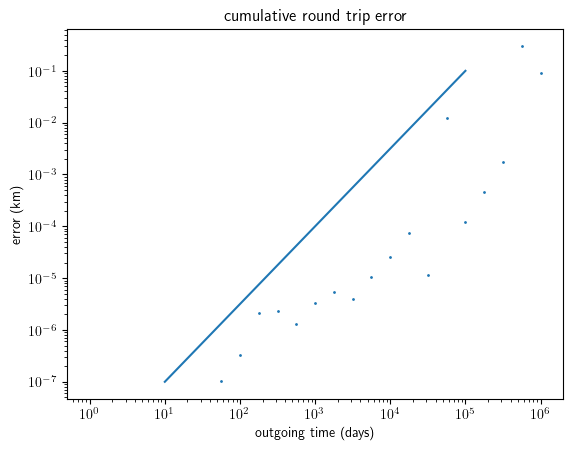

In [12]:
plt.scatter(t[:], dx[:], s=1)

#plt.ylim(1e-6, 1)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('outgoing time (days)')
plt.ylabel('error (km)')
plt.title('cumulative round trip error')
plt.plot((1e1,1e5), (1e-7,1e-1))
#plt.plot((1e2,1e5), (1e-8,1e-5))
#plt.plot((1e1,1e6), (1e-7,1e-3))
plt.savefig('roundtrip_Holman.pdf')

In [ ]:
with open('out_and_back_results.pkl', 'rb') as file:
    results = pickle.load(file)

In [2]:
# This is a comparison of numerically calculated second order derivatives 
#using real particles with displaced initial conditions to the results from the 
#variational particle trajectories.  The initial displacements are 1e-8, 
#so the differences cannot be better than about that.

# This cell is for testing the variational equations.  We set up a central trajectory
# and two sets of six displace initial conditions, a pair for each position and velocity
# component.  We then use those pairs to compute second order numerical derivatives that
# we compare to the analytic derivatives.
#
# DE441
# (3666) Holman
#2458849.500000000 = A.D. 2020-Jan-01 00:00:00.0000 TDB [del_T=     69.183900 s]
# X = 3.338875350265349E+00 Y =-9.176518267602161E-01 Z =-5.038590677470149E-01
# VX= 2.805663315227095E-03 VY= 7.550408688437705E-03 VZ= 2.980028207454247E-03
    
row = [3.3388753502614090e+00, -9.1765182678903168e-01, -5.0385906775843303e-01,
     2.8056633153049852e-03,  7.5504086883996860e-03,  2.9800282074358684e-03]

tstart, tstep, trange = 2458849.5-jd_ref, 20.0, 0
#tstart, tstep, trange = 2458849.5, 20.0, 0

epoch = tstart
tend = tstart + trange

instates = np.array([row])
n_var = 6
n_particles = 13
geocentric = 0


invar_part = np.zeros(6, dtype=int)
invar = np.identity(6)

scale = 1e-8
instatesp = np.array([row]*6)+scale*invar
instatesm = np.array([row]*6)-scale*invar
instates=np.vstack([instates, instatesm, instatesp])

nsubsteps = 10
hg = np.arange(0, 1.1, 0.1, dtype=np.double)

# Turn off the non-grav terms
part_params = None
var_part_params = None

times, states, var, var_ng, status = assist.integration_function(tstart, tend, tstep, geocentric, 
                                                                       n_particles, instates, part_params, n_var, invar_part, invar, var_part_params, hg,
                                                                       nsubsteps=nsubsteps)



In [2]:
%%time
# This cell is also for testing the variational equations.  We set up a central trajectory
# and two sets of six displace initial conditions, a pair for each position and velocity
# component.  We then use those pairs to compute second order numerical derivatives that
# we compare to the analytic derivatives.
# The difference here is that we are doing an actual integration and comparing the results
# at the end of the integration.
#
# DE441
# (3666) Holman
#2458849.500000000 = A.D. 2020-Jan-01 00:00:00.0000 TDB [del_T=     69.183900 s]
# X = 3.338875350265349E+00 Y =-9.176518267602161E-01 Z =-5.038590677470149E-01
# VX= 2.805663315227095E-03 VY= 7.550408688437705E-03 VZ= 2.980028207454247E-03
    
#row =[3.338875350265349E+00, -9.176518267602161E-01, -5.038590677470149E-01, 2.805663315227095E-03, 7.550408688437705E-03, 2.980028207454247E-03]
row = [3.338875349745594E+00, -9.176518281675284E-01, -5.038590682977396E-01, 2.805663319000732E-03, 7.550408687780768E-03, 2.980028206579994E-03]

row = [3.3388753502614090e+00, -9.1765182678903168e-01, -5.0385906775843303e-01,
     2.8056633153049852e-03,  7.5504086883996860e-03,  2.9800282074358684e-03]

tstart, tstep, trange = 2458849.5-jd_ref, 20.0, 100

epoch = tstart
tend = tstart + trange

instates = np.array([row])
n_var = 6
n_particles = 13
geocentric = 0


invar_part = np.zeros(6, dtype=int)
invar = np.identity(6)

scale = 1e-8
instatesp = np.array([row]*6)+scale*invar
instatesm = np.array([row]*6)-scale*invar
instates=np.vstack([instates, instatesm, instatesp])

nsubsteps = 10
hg = np.arange(0, 1.1, 0.1, dtype=np.double)

# Turn off the non-grav terms
part_params = None
var_part_params = None

times, states, var, var_ng, status = assist.integration_function(tstart, tend, tstep, geocentric, 
                                                                       n_particles, instates, part_params, n_var, invar_part, invar, var_part_params, hg,
                                                                       nsubsteps=nsubsteps)



CPU times: user 71.1 ms, sys: 5.08 ms, total: 76.1 ms
Wall time: 74 ms


In [ ]:

# These are for the direct accelerations
with open('vary_acc.out.direct_integrated') as file:
    var_lines = file.readlines()
    for i in range(3):
        difference_line=np.array(var_lines[i].strip().split()[2:], dtype=np.double)
        var_line=np.array(var_lines[i+6].strip().split()[2:], dtype=np.double)
        print((difference_line-var_line)/np.abs(var_line))

In [ ]:
# These are for the direct accelerations
with open('vary_acc.out.earth_J2J4_integrated') as file:
    var_lines = file.readlines()
    for i in range(3):
        difference_line=np.array(var_lines[i].strip().split()[2:], dtype=np.double)
        var_line=np.array(var_lines[i+6].strip().split()[2:], dtype=np.double)
        print((difference_line-var_line)/np.abs(var_line))

In [ ]:
# These are for the direct accelerations
with open('vary_acc.out.solar_J2_integrated') as file:
    var_lines = file.readlines()
    for i in range(3):
        difference_line=np.array(var_lines[i].strip().split()[2:], dtype=np.double)
        var_line=np.array(var_lines[i+6].strip().split()[2:], dtype=np.double)
        print((difference_line-var_line)/np.abs(var_line))

In [ ]:
# These are for the direct accelerations
with open('vary_acc.out.simple_GR_integrated') as file:
    var_lines = file.readlines()
    for i in range(3):
        difference_line=np.array(var_lines[i].strip().split()[2:], dtype=np.double)
        var_line=np.array(var_lines[i+6].strip().split()[2:], dtype=np.double)
        print((difference_line-var_line)/np.abs(var_line))

In [ ]:
# These are for the direct accelerations
with open('vary_acc.out.eih') as file:
    var_lines = file.readlines()
    for i in range(3):
        difference_line=np.array(var_lines[i].strip().split()[2:], dtype=np.double)
        var_line=np.array(var_lines[i+6].strip().split()[2:], dtype=np.double)
        print((difference_line-var_line)/np.abs(var_line))

In [ ]:
# These are for the direct accelerations
with open('vary_acc.out.eih_integrated') as file:
    var_lines = file.readlines()
    for i in range(3):
        difference_line=np.array(var_lines[i].strip().split()[2:], dtype=np.double)
        var_line=np.array(var_lines[i+6].strip().split()[2:], dtype=np.double)
        print((difference_line-var_line)/np.abs(var_line))

In [3]:
%%time
tstart, tstep, trange = 2458849.5-jd_ref, 20.0, 10

epoch = tstart
tend = tstart + trange

instates = np.array([row])
n_var = 6
n_particles = 7
geocentric = 0


invar_part = np.zeros(6, dtype=int)
invar = np.identity(6)

scale = 1e-8
instatesp = np.array([row]*6)+scale*invar
instates=np.vstack([instates, instatesp])

# Turn off the non-grav terms
part_params = None
var_part_params = None

nsubsteps = 10
hg = np.arange(0, 1.1, 0.1, dtype=np.double)

times, states, var, var_ng, status = assist.integration_function(tstart, tend, tstep, geocentric, 
                                                                       n_particles, instates, part_params, n_var, invar_part, invar, var_part_params, hg,
                                                                       nsubsteps=nsubsteps)

CPU times: user 9.92 ms, sys: 1.85 ms, total: 11.8 ms
Wall time: 9.75 ms


In addition to varying the initial conditions, it is possible to vary the 'particle parameters'.  These are constants such as the A1, A2, and A3 values for the formulation of non-gravitational forces that can be included in the equations of motion.  Just like the initial conditions, these values are intrinsic to a particular particle.  One might be interested in the dependence of the trajectory on small changes in those values, especially when fitting for the orbits and the non-gravitational parameters.

In [7]:
# Here is a demonstration of a formulation of non-gravitational forces.
# We want to be able to make small variations in the non-gravitational parameters in order
# to test the sensitivity to those parameters.  We will ultimately use this in 
# orbit fitting.  Just as we develop the derivatives with respect to the initials, 
# we have developed the analytic derivatives with respect to the
# non-gravitational parameters (which are linear).  Each test particle has associated with
# it a set of non-gravitational parameters, so we developed a means of storing those values.
#
# 
# This cell verifies that the analytical derivatives and the means of storing the parameters
# are correct.

# DE441
# (3666) Holman
#2458849.500000000 = A.D. 2020-Jan-01 00:00:00.0000 TDB [del_T=     69.183900 s]
# X = 3.338875350265349E+00 Y =-9.176518267602161E-01 Z =-5.038590677470149E-01
# VX= 2.805663315227095E-03 VY= 7.550408688437705E-03 VZ= 2.980028207454247E-03
    
row = [3.3388753502614090e+00, -9.1765182678903168e-01, -5.0385906775843303e-01,
     2.8056633153049852e-03,  7.5504086883996860e-03,  2.9800282074358684e-03]

tstart, tstep, trange = 2458849.5-jd_ref, 20.0, 100

epoch = tstart
tend = tstart + trange

# Create two real particles with the same initial position and velocity
# but with different, perturbed non-grav parameters.
instates = np.array([row]*2)
n_particles = 2

# A1 of the two real particles differs by 1e-10
#part_params = np.array([[1e-10, 0.0, 0.0],[2e-10, 0.0, 0.0]])

# A2 of the two real particles differs by 1e-10
#part_params = np.array([[0.0, 1e-10, 0.0],[0.0, 2e-10, 0.0]])

# A3 of the two real particles differs by 1e-10
part_params = np.array([[0.0, 0.0, 1e-10],[0.0, 0.0, 2e-10]])

geocentric = 0

# Now set up the variational particles.  There are
# no variations in the position and velocity, but there
# is a variation in A1, A2, or A3, corresponding to the
# difference above.

n_var = 1

invar_part = np.zeros(0, dtype=int)
invar = np.zeros((1, 6))

#var_part_params = np.array([1., 0., 0.])
#var_part_params = np.array([0., 1., 0.])
var_part_params = np.array([0., 0., 1.])

nsubsteps = 10
hg = np.arange(0, 1.1, 0.1, dtype=np.double)

times, states, var, var_ng, status = assist.integration_function(tstart, tend, tstep, geocentric, 
                                                                       n_particles, instates, part_params, n_var, invar_part, invar, var_part_params, hg,
                                                                       nsubsteps=nsubsteps)

(states[:,1,:]-states[:,0,:])[-1], (var*1e-10)[-1], (states[:,1,:]-states[:,0,:])[-1]-(var*1e-10)[-1]

(array([0., 0., 0., 0., 0., 0.]),
 array([[0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0.]]))

In [2]:
# Here are setting up the integration of Apophis from 2029 Jan 1 to 2030 Jan 1.  There is a very
# close encounter between the asteroid and the Earth on 2029 April 13.  This is a significant
# stress test for the integrator, one that we fail!

# Davide's email: Apophis heliocentric state (km, km/sec)
apophis_davide = np.array([-8.1542363951087192E+07, 1.2904139592677031E+08, 4.5894255749981791E+07,
                           -2.4167584904236399E+01, -1.0027783141840974E+01, -4.3343221001451306E+00])

# Convert to AU and AU/day
au = 1.495978707e+08
day = 24*3600.

apophis_davide[0:3] = apophis_davide[0:3]/au
apophis_davide[3:6] = apophis_davide[3:6]*day/au

# Convert to barycentric

GMsun, sun = assist.all_ephem(0, jd_ref, 2462137.5-jd_ref)
apophis_davide = apophis_davide + sun[0:6]

davide_end = np.array([3.6363608866809485E+06, 1.8237263291973537E+08, 7.1543155513210312E+07,
                       -2.3434769151826927E+01, 1.0706266853019808E+00, 2.9804565046315526E-02])
#davide_end = davide_end/au

davide_quad = np.array([3.6363612965853503E+06, 1.8237263299836367E+08, 7.1543155513458297E+07])
davide_end[0:3] = davide_end[0:3]/au
davide_end[3:6] = davide_end[3:6]*day/au

# Convert to barycentric

GMsun, sun = assist.all_ephem(0, jd_ref, 2462502.5-jd_ref)
davide_end = davide_end + sun[0:6]


In [3]:
apophis_davide

array([-0.54384383,  0.86130839,  0.30626328, -0.01395836, -0.00578671,
       -0.0025012 ])

In [26]:
(states[-1][0]-davide_end)*1.5e8

array([-1.44155353e-01, -3.64231978e-03, -1.28781402e-02, -6.36048506e-05,
       -1.35997649e-03, -5.79830008e-04])

In [11]:
np.linalg.norm((states[-1][0]-prev)[0:3])*1.5e11
#(states[-1][0]-davide_end)[0:3]*1.5e8

13.868343607926532

In [7]:
prev=states[-1][0]

In [2]:
apophis_davide = np.array([-4.0985308396619768E-01, 9.0701988670897504E-01, 3.2679194720961291E-01, -1.5075524121278910E-02, -3.7135599257017366E-03, -1.7618679887745228E-03])
GMsun, sun = assist.all_ephem(0, jd_ref, 2459215.5-jd_ref)
apophis_davide = apophis_davide + sun[0:6]

In [2]:
# For these integrations, we have turned off solar J2 and Earth J3 and J4.  We keep full
# EIH GR and all perturbers.  Initially the perturbers are in ephemeris order.
tstart, tstep, trange = 2459215.5-jd_ref, 20.0, 0.0

tstart, tstep, trange = 2462137.500000000, 20.0, 70.0

epoch = tstart
tend = tstart + trange

delta = 0e-16
instates = apophis_davide.copy()
instates[2] += delta

#n_var = 6
n_var = 0
#n_particles = 7
n_particles = 1
geocentric = 0

#invar_part = np.zeros(6, dtype=int)
invar_part = None
#invar = np.identity(6)
invar = None

scale = 1e-8
#instatesp = np.array([row]*6)+scale*invar
#instates=np.vstack([instates, instatesp])

# Turn off the non-grav terms
part_params = None
part_params = np.array([4.999999873689E-13, -2.901085508711E-14, 0.])
part_params = np.array([5.E-13, -2.901085583204654E-14, 0.0])

var_part_params = None

nsubsteps = 10
hg = np.arange(0, 1.1, 0.1, dtype=np.double)

times, states, var, var_ng, status = assist.integration_function(tstart, tend, tstep, geocentric, 
                                                                n_particles, instates, part_params, n_var, invar_part, invar, var_part_params, hg,
                                                                nsubsteps=nsubsteps, 
                                                                epsilon=1e-8, min_dt=0.0001)

NameError: name 'jd_ref' is not defined

In [3]:
jpl_apophis_start = np.array([-5.438438272487275E-01, 8.613083849766898E-01, 3.062632838449565E-01,
                                  -1.395835707852086E-02, -5.786710318140503E-03, -2.501201213363947E-03])
jpl_apophis_end = np.array([2.487313278602400E-02,  1.219360347406856E+00, 4.784027483997944E-01,
         -1.353775762820969E-02, 6.220289094212166E-04, 1.888305072804014E-05])

# For these integrations, we have turned off solar J2 and Earth J3 and J4.  We keep full
# EIH GR and all perturbers.  Initially the perturbers are in ephemeris order.
tstart, tstep, trange = 2462137.500000000-jd_ref, 20.0, (2462502.5-2462137.5)

epoch = tstart
tend = tstart + trange

delta = 0e-16
instates = jpl_apophis_start.copy()
instates[0] += delta

#n_var = 6
n_var = 0
#n_particles = 7
n_particles = 1
geocentric = 0

#invar_part = np.zeros(6, dtype=int)
invar_part = None
#invar = np.identity(6)
invar = None

scale = 1e-8
#instatesp = np.array([row]*6)+scale*invar
#instates=np.vstack([instates, instatesp])

#  AMRAT=  0.                                                                  
#  A1= 4.999999873689E-13  A2= -2.901085508711E-14 A3= 0.                      
# Non-standard or simulated/proxy model:                                        
#   ALN=  1.            NK=  0.       NM=  2.       NN=  5.093    R0=  1.      

# Turn off the non-grav terms
part_params = None
#part_params = np.array([4.999999873689E-13, -2.901085508711E-14, 0.])
A1, A2, A3 = 4.999999873689E-13, -2.901085508711E-14, 0.0
#A1, A2, A3 = 0.0, -5.592839897872E-14, 0.0
part_params = np.array([A1, A2, A3])

var_part_params = None

nsubsteps = 10
hg = np.arange(0, 1.1, 0.1, dtype=np.double)

times, states, var, var_ng, status = assist.integration_function(tstart, tend, tstep, geocentric, 
                                                                n_particles, instates, part_params, n_var, invar_part, invar, var_part_params, hg,
                                                                nsubsteps=nsubsteps, 
                                                                epsilon=1e-8, min_dt=0.001)

#(states[-1][0]-prev)[0:3]*1.5e11
(states[-1][0]-jpl_apophis_end)[0:3]*1.5e8


array([-3506.78647708,  -572.60925072, -1075.40649874])

In [17]:
apophis_davide-states[0][0]

array([-7.78981377e-04, -2.39792694e-04, -9.85771337e-05,  4.82141743e-06,
       -1.50236464e-06, -7.83556806e-07])

In [43]:
(davide_end-jpl_apophis_end)[0:3]*1.5e8


array([147465.62454713, -41326.00688076, -25778.40616427])

In [12]:
davide_end, states[-1][0]

(array([ 2.58562369e-02,  1.21908484e+00,  4.78230892e-01, -1.35332038e-02,
         6.23038908e-04,  1.91580034e-05]),
 array([-0.77127858,  0.79936769,  0.28269118, -0.01081027, -0.00907687,
        -0.00366244]))

In [ ]:
tstart, tstep, trange = 2462137.500000000, 20.0, (2462502.5-2462137.5)

epoch = tstart
tend = tstart + trange

delta = 0e-16
instates = apophis_davide_geo.copy()
instates[0] += delta

#n_var = 6
n_var = 0
#n_particles = 7
n_particles = 1
geocentric = 1

#invar_part = np.zeros(6, dtype=int)
invar_part = None
#invar = np.identity(6)
invar = None

scale = 1e-8
#instatesp = np.array([row]*6)+scale*invar
#instates=np.vstack([instates, instatesp])

# Turn off the non-grav terms
part_params = None
#part_params = np.array([4.999999873689E-13, -2.901085508711E-14, 0.])

var_part_params = None

nsubsteps = 10
hg = np.arange(0, 1.1, 0.1, dtype=np.double)

times, states, var, var_ng, status = ephem_forces.integration_function(tstart, tend, tstep, geocentric, 
                                                                n_particles, instates, part_params, n_var, invar_part, invar, var_part_params, hg,
                                                                nsubsteps=nsubsteps, 
                                                                epsilon=1e-8, min_dt=1e-2)


(states[-1][0]-davide_end_geo)[0:3]*1.5e8

In [ ]:
states[0], davide_end_geo

In [ ]:
# Davide's email: Apophis heliocentric state (km, km/sec)
apophis_davide = np.array([-8.1542363951087192E+07, 1.2904139592677031E+08, 4.5894255749981791E+07,
                           -2.4167584904236399E+01, -1.0027783141840974E+01, -4.3343221001451306E+00])

# Convert to AU and AU/day
au = 1.495978707e+08
day = 24*3600.

apophis_davide[0:3] = apophis_davide[0:3]/au
apophis_davide[3:6] = apophis_davide[3:6]*day/au

# Convert to barycentric

GMsun, sun = ephem_forces.all_ephem(0, 2462137.5)
GMearth, earth = ephem_forces.all_ephem(3, 2462137.5)
apophis_davide = apophis_davide + sun[0:6]
apophis_davide_geo = apophis_davide - earth[0:6]
apophis_davide, apophis_davide_geo

In [ ]:
 X =-3.667730235361980E-01 Y =-2.464231468509984E-02 Z =-7.780873131249641E-02
 VX= 3.233994167941887E-03 VY=-2.872012615596444E-03 VZ=-1.238588361846996E-03

 X =-5.438438267660153E-01 Y = 8.613083852105639E-01 Z = 3.062632839466073E-01
 VX=-1.395835708298692E-02 VY=-5.786710310267235E-03 VZ=-2.501201210651436E-03

In [ ]:
(states[-1][0]-davide_end)[0:3]*1.5e8
# Simple GR
# array([-120.0659108 ,  -27.65230961,   51.11462017])
# array([60.28234343,  4.34839065, 73.48195701])

In [ ]:
apophis_end = np.array([2.484699982288731E-02, 1.219356040545631E+00, 4.783952363872187E-01,
     -1.353782216970214E-02, 6.217728576980117E-04, 1.875453741306976E-05])

In [ ]:
def residuals(instates):

    #start_states = instates.copy()
    #start_states += delta
    tstart, tstep, trange = 2462137.500000000, 20.0, (2462502.5-2462137.5)

    epoch = tstart
    tend = tstart + trange

    n_var = 0
    n_particles = 1
    geocentric = 0

    invar_part = None
    invar = None
    part_params = np.array([4.999999873689E-13, -2.901085508711E-14, 0.])
    var_part_params = None

    nsubsteps = 10
    hg = np.arange(0, 1.1, 0.1, dtype=np.double)

    times, states, var, var_ng, status = ephem_forces.integration_function(tstart, tend, tstep, geocentric, 
                                                                           n_particles, instates, part_params, n_var, invar_part, invar, var_part_params, hg,
                                                                           nsubsteps=nsubsteps)

    resid = (states[-1][0]-apophis_end)*1.5e8
    print('func', resid)

    return resid


In [ ]:
def jacobian(instates):

    print('jac', instates)
    #start_states = instates.copy()
    #start_states += delta
    tstart, tstep, trange = 2462137.500000000, 20.0, (2462502.5-2462137.5)

    epoch = tstart
    tend = tstart + trange

    n_var = 6
    n_particles = 1
    geocentric = 0

    invar_part = np.zeros(6, dtype=int)
    invar = np.identity(6)    
    part_params = None
    var_part_params = None

    nsubsteps = 10
    hg = np.arange(0, 1.1, 0.1, dtype=np.double)

    times, states, var, var_ng, status = ephem_forces.integration_function(tstart, tend, tstep, geocentric, 
                                                                           n_particles, instates, part_params, n_var, invar_part, invar, var_part_params, hg,
                                                                           nsubsteps=nsubsteps)

    return var[-1]


In [ ]:
jacobian(instates)

In [ ]:
# Apophis

row = [-5.438438267660153E-01, 8.613083852105639E-01, 3.062632839466073E-01,
     -1.395835708298692E-02, -5.786710310267235E-03, -2.501201210651436E-03]


tstart, tstep, trange = 2462137.500000000, 20.0, (2462502.5-2462137.5)

epoch = tstart
tend = tstart + trange


instates = np.array([row])

n_var = 6
n_particles = 1
geocentric = 0

invar_part = np.zeros(6, dtype=int)
invar = np.identity(6)

# Turn off the non-grav terms
part_params = None
var_part_params = None

nsubsteps = 10
hg = np.arange(0, 1.1, 0.1, dtype=np.double)

times, states, var, var_ng, status = ephem_forces.integration_function(tstart, tend, tstep, geocentric, 
                                                                       n_particles, instates, part_params, n_var, invar_part, invar, var_part_params, hg,
                                                                       nsubsteps=nsubsteps)


In [ ]:
from scipy.optimize import least_squares

results = least_squares(residuals, instates.copy()[0], xtol=1e-14, diff_step=[1e-12]*6)

In [ ]:
results = least_squares(residuals, instates.copy()[0], jacobian, xtol=1e-13, diff_step=[1e-11]*6)

In [ ]:
J2 = np.array([-6.4016432868089768E-24, 3.3086859091937360E-24, 5.9272835926728188E-24])
J2J3 = np.array([-6.4016434902013444E-24, 3.3086860143169725E-24, 5.9272834624520344E-24])
J2J3J4 = np.array([-6.4016434902019924E-24, 3.3086860143173075E-24, 5.9272834624537800E-24])

In [ ]:
J2J3J4_assist = np.array([-6.4016434902019924e-24, 3.3086860143173086e-24, 5.9272834624537763e-24])

In [ ]:
(J2J3J4_assist-J2J3J4)/np.abs(J2J3J4)

In [ ]:
J3=(J2J3-J2)
J4= J2J3J4-J3-J2
J2, J3, J4

In [ ]:
-1.30220784e-31/2.2735274756433094e-31

In [ ]:
J3 2.0339236782613288e-31   -1.0512323653686838e-31    2.2735274756433094e-31
J3 -2.0339236782613288e-31   1.0512323653686838e-31   -2.4056845400187710e-31
J3 -2.0339236782613288e-31   1.0512323653686838e-31   -1.3022078412434784e-31
J4 -6.4809879553660478e-37  3.3496951587039971e-37  1.7455803467851056e-36

In [ ]:
# DE441
# (3666) Holman
#2458849.500000000 = A.D. 2020-Jan-01 00:00:00.0000 TDB [del_T=     69.183900 s]
# X = 3.338875350265349E+00 Y =-9.176518267602161E-01 Z =-5.038590677470149E-01
# VX= 2.805663315227095E-03 VY= 7.550408688437705E-03 VZ= 2.980028207454247E-03
    
#row =[3.338875350265349E+00, -9.176518267602161E-01, -5.038590677470149E-01, 2.805663315227095E-03, 7.550408688437705E-03, 2.980028207454247E-03]
row = [3.338875349745594E+00, -9.176518281675284E-01, -5.038590682977396E-01, 2.805663319000732E-03, 7.550408687780768E-03, 2.980028206579994E-03]

row = [3.3388753502614090e+00, -9.1765182678903168e-01, -5.0385906775843303e-01,
     2.8056633153049852e-03,  7.5504086883996860e-03,  2.9800282074358684e-03]

tstart, tstep, trange = 2458849.5, 20.0, 20

epoch = tstart
tend = tstart + trange

instates = np.array([row])
n_var = 9
n_particles = 7
geocentric = 0





invar_part = np.zeros(9, dtype=int)
invar = np.identity(9)[:,0:6]

var_part_params = np.identity(9)[:, 6:9]
var_part_params = np.arange(27).reshape(9, -1)*1e-10


scale = 1e-8
instatesp = np.array([row]*6)+scale*np.identity(6)
instates=np.vstack([instates, instatesp])

part_params = np.zeros((instates.shape[0], 3)) + 1e-10
part_params = np.arange(21).reshape(7, -1)*1e-10

nsubsteps = 10
hg = np.arange(0, 1.1, 0.1, dtype=np.double)

In [ ]:
times, states, var, var_ng, status = ephem_forces.integration_function(tstart, tend, tstep, geocentric, 
                                                                       n_particles, instates, part_params, n_var, invar_part, invar, var_part_params, hg,
                                                                       nsubsteps=nsubsteps)

In [ ]:
# DE441
# (3666) Holman
#2458849.500000000 = A.D. 2020-Jan-01 00:00:00.0000 TDB [del_T=     69.183900 s]
# X = 3.338875350265349E+00 Y =-9.176518267602161E-01 Z =-5.038590677470149E-01
# VX= 2.805663315227095E-03 VY= 7.550408688437705E-03 VZ= 2.980028207454247E-03
    
#row =[3.338875350265349E+00, -9.176518267602161E-01, -5.038590677470149E-01, 2.805663315227095E-03, 7.550408688437705E-03, 2.980028207454247E-03]
row = [3.338875349745594E+00, -9.176518281675284E-01, -5.038590682977396E-01, 2.805663319000732E-03, 7.550408687780768E-03, 2.980028206579994E-03]

row = [3.3388753502614090e+00, -9.1765182678903168e-01, -5.0385906775843303e-01,
     2.8056633153049852e-03,  7.5504086883996860e-03,  2.9800282074358684e-03]

tstart, tstep, trange = 2458849.5, 20.0, 0

epoch = tstart
tend = tstart + trange

instates = np.array([row])
n_particles = 1

part_params = np.array([0.0, 0.0, 0.0])
geocentric = 0

n_var = 1

invar_part = np.zeros(0, dtype=int)
invar = np.zeros((1, 6))
var_part_params = np.array([1., 0., 0.])
var_part_params = np.array([0., 1., 0.])
var_part_params = np.array([0., 0., 1.])

nsubsteps = 10
hg = np.arange(0, 1.1, 0.1, dtype=np.double)

%%time
times, states, var, var_ng, status = ephem_forces.integration_function(tstart, tend, tstep, geocentric, 
                                                                       n_particles, instates, part_params, n_var, invar_part, invar, var_part_params, hg,
                                                                       nsubsteps=nsubsteps)

In [ ]:
# DE441
# (3666) Holman
#2458849.500000000 = A.D. 2020-Jan-01 00:00:00.0000 TDB [del_T=     69.183900 s]
# X = 3.338875350265349E+00 Y =-9.176518267602161E-01 Z =-5.038590677470149E-01
# VX= 2.805663315227095E-03 VY= 7.550408688437705E-03 VZ= 2.980028207454247E-03
    
#row =[3.338875350265349E+00, -9.176518267602161E-01, -5.038590677470149E-01, 2.805663315227095E-03, 7.550408688437705E-03, 2.980028207454247E-03]
row = [3.338875349745594E+00, -9.176518281675284E-01, -5.038590682977396E-01, 2.805663319000732E-03, 7.550408687780768E-03, 2.980028206579994E-03]

row = [3.3388753502614090e+00, -9.1765182678903168e-01, -5.0385906775843303e-01,
     2.8056633153049852e-03,  7.5504086883996860e-03,  2.9800282074358684e-03]

tstart, tstep, trange = 2458849.5, 20.0, 200

epoch = tstart
tend = tstart + trange

instates = np.array([row])
n_particles = 1

#part_params = np.zeros(0, dtype=np.double)
part_params = None
geocentric = 0

n_var = 0

#invar_part = np.zeros(0, dtype=np.double)
invar_part = None
#invar = np.zeros(0, dtype=np.double)
invar = None
#var_part_params = np.zeros(0, dtype=np.double)
var_part_params = None

nsubsteps = 10
hg = np.arange(0, 1.1, 0.1, dtype=np.double)

In [ ]:
%%time
times, states, var, var_ng, status = ephem_forces.integration_function(tstart, tend, tstep, geocentric, 
                                                                       n_particles, instates, part_params, n_var, invar_part, invar, var_part_params, hg,
                                                                       nsubsteps=nsubsteps)

In [ ]:
# DE441
# (3666) Holman
#2458849.500000000 = A.D. 2020-Jan-01 00:00:00.0000 TDB [del_T=     69.183900 s]
# X = 3.338875350265349E+00 Y =-9.176518267602161E-01 Z =-5.038590677470149E-01
# VX= 2.805663315227095E-03 VY= 7.550408688437705E-03 VZ= 2.980028207454247E-03
    
#row =[3.338875350265349E+00, -9.176518267602161E-01, -5.038590677470149E-01, 2.805663315227095E-03, 7.550408688437705E-03, 2.980028207454247E-03]
row = [3.338875349745594E+00, -9.176518281675284E-01, -5.038590682977396E-01, 2.805663319000732E-03, 7.550408687780768E-03, 2.980028206579994E-03]

row = [3.3388753502614090e+00, -9.1765182678903168e-01, -5.0385906775843303e-01,
     2.8056633153049852e-03,  7.5504086883996860e-03,  2.9800282074358684e-03]

tstart, tstep, trange = 2458849.5, 20.0, 100

epoch = tstart
tend = tstart + trange

instates = np.array([row])
n_var = 6
n_particles = 13
geocentric = 0


invar_part = np.zeros(6, dtype=int)
invar = np.identity(6)

scale = 1e-8
instatesp = np.array([row]*6)+scale*invar
instatesm = np.array([row]*6)-scale*invar
instates=np.vstack([instates, instatesm, instatesp])

nsubsteps = 10
hg = np.arange(0, 1.1, 0.1, dtype=np.double)


times, states, var, var_ng, status = ephem_forces.integration_function(tstart, tend, tstep, geocentric, 
                                                                       n_particles, instates, n_var, invar_part, invar, hg,
                                                                       nsubsteps=nsubsteps)


In [ ]:
for state in instates:
    print('state')
    print('%.16le %.16le %.16le' % (state[0], state[1], state[2]))
    print('%.16le %.16le %.16le' % (state[3], state[4], state[5]))

In [ ]:
for state in invar:
    print('var 0')
    print('%.16le %.16le %.16le' % (state[0], state[1], state[2]))
    print('%.16le %.16le %.16le' % (state[3], state[4], state[5]))

In [ ]:
# DE441
# (3666) Holman
#2458849.500000000 = A.D. 2020-Jan-01 00:00:00.0000 TDB [del_T=     69.183900 s]
# X = 3.338875350265349E+00 Y =-9.176518267602161E-01 Z =-5.038590677470149E-01
# VX= 2.805663315227095E-03 VY= 7.550408688437705E-03 VZ= 2.980028207454247E-03
    
#row =[3.338875350265349E+00, -9.176518267602161E-01, -5.038590677470149E-01, 2.805663315227095E-03, 7.550408688437705E-03, 2.980028207454247E-03]
row = [3.338875349745594E+00, -9.176518281675284E-01, -5.038590682977396E-01, 2.805663319000732E-03, 7.550408687780768E-03, 2.980028206579994E-03]

instates = np.array([row])
n_particles = 1

#tstart, tstep, trange = 2458849.5, 20.0, 100

epoch, tstart, tstep, trange = 2458849.5, 2458849.5, 20.0, 100
#epoch = tstart

tend = tstart + trange

print(tstart, tend, tstep)

times, states, var, var_ng, status = ephem_forces.production_integration_function_wrapper(tstart, tend, epoch, instates)


times, states#, var

In [ ]:
instates2 = states[-1]
tstart2 = times[-1]
tend2 = tstart
tstep2 = -tstep
epoch2 = tstart2

times2, states2, var2, var_ng2, status2 = ephem_forces.production_integration_function_wrapper(tstart2, tend2, epoch2, instates2)


In [ ]:
states[0]-states2[-1]

### Plan

The integrator works.  Now it's time to use it.  

1. Integrate over some interval, outputting substeps for each integration step.
2. Use the output of the substeps to generate Chebyshev polynomials for each integration step.
3. Use those to accurately interpolate the position, and possiby velocity, of the integrated object at any time within the interval.

4. Get the observatory position at a set of UTC times.
5. Use iterative light-time correction to get the observed position of the object at those times.

6. Integrate initial conditions to match a set of observations.

We collect some initial conditions from JPL Horizons.  For asteroid (3666) Holman, we grab the barycentric position and velocity vectors, in units of au and au/day.

If we swap the start and end points, we get the same result.

In [ ]:
times, states, var, var_ng, status = ephem_forces.production_integration_function_wrapper(tstart, tend, epoch, instates)


In [ ]:

timesp, statesp, varp, varp_ng, statusp = ephem_forces.production_integration_function_wrapper(tend, tstart, epoch, instates)


In [ ]:
states

In [ ]:
statesp

In [ ]:
np.sum(statesp-states)

If we keep the same epoch but cut down the range, the overlapping section is nearly the same, to the few meter level.  Numerically, this probably due to slightly different step sizes being used.  It might be the best that can be achieved with the precision of the positions of the  planets and asteroids.  Regardless, it is extremely small.

In [ ]:
timesp, statesp, varp, varp_ng, statusp = ephem_forces.production_integration_function_wrapper(tend-2000, tend, epoch, instates)#, epsilon=1e-8, tstep=20)


In [ ]:
(statesp[-1][0]-states[-1][0])

The underlying numerical integrator is IAS15 (Rein & Liu 2015), a 15th order predictor-corrector integrator with an adaptive step-size.  Each time step involves eight sub-steps.  We have modified the integrator to output the state at each of the sub-steps in order to support interpolation of the output.

Below is a plot of the overall step-size as a function of elapsed integration time.  (The sub-steps are smaller).  A rough periodicity on the ~2000 day asteroid orbital period is evident.

Text(0, 0.5, 'step-size (days)')

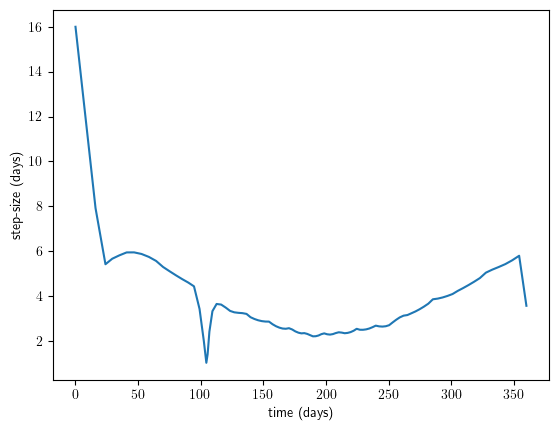

In [32]:
t=(times-times[0])[::8]
dt=t[1:]-t[:-1]

plt.plot(t[:-1], dt)
plt.xlabel("time (days)")
plt.ylabel("step-size (days)")

And here is a histogram of the step-sizes.  Most are 15-25 days.

In [ ]:
_=plt.hist(dt,bins=30)
plt.xlabel("step-size (days)")
plt.ylabel("N")

Here are the xyz values as a function of time.  The coordinate system is equatorial, so the z component is not nearly zero.

In [ ]:
for i in range(3):
    plt.plot(times-times[0], states[:,0,i])

In [ ]:
plt.plot(states[:,0,0], states[:,0,1], linewidth=0.2)
plt.axis('square')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')

And we can compare the output to what JPL Horizons gives.  

In [ ]:
# No non-gravs
# dt_min = 1e-2
# epsilon = 1e-8

# This is from JPL Horizons, using DE441 for the planets and sb441-n16 for the massive asteroids.

#2468849.500000000 = A.D. 2047-May-19 00:00:00.0000 TDB [del_T=     69.185214 s]
# X = 3.170610684726161E+00 Y =-1.304064355874703E+00 Z =-6.557860840042533E-01
# VX= 3.883515127959035E-03 VY= 7.175467895958359E-03 VZ= 2.785507467676363E-03

#DE441

holman = np.array([3.170610684726161E+00, -1.304064355874703E+00, -6.557860840042533E-01,
                   3.883515127959035E-03, 7.175467895958359E-03, 2.785507467676363E-03])
    


In [ ]:
# No non-gravs
# dt_min = 1e-2
# epsilon = 1e-8

# This is from JPL Horizons, using DE441 for the planets and sb441-n16 for the massive asteroids.

#(394130)
#2468849.500000000 = A.D. 2047-May-19 00:00:00.0000 TDB [del_T=     69.185214 s]
# X =-3.504730383385668E+00 Y =-2.123262871413949E+00 Z =-5.234096631335790E-01
# VX= 5.050680077417927E-03 VY= 1.883409101375705E-03 VZ=-8.444052595199177E-04

ast_394130 = np.array([-3.504730383385668E+00, -2.123262871413949E+00, -5.234096631335790E-01, 5.050680077417927E-03, 1.883409101375705E-03, -8.444052595199177E-04])

The agreement after ~27 years is excellent, ~25 m or 1e-2 mas (assuming the object is 3 AU away)!  The remaining difference is probably due to the integrator or differences in the precision of the constants.


In [ ]:
((states[-1][0]-holman)/3)*206265, (states[-1][0]-holman)*1.5e11

In [ ]:
((states[-1][0]-ast_394130)/3)*206265, (states[-1][0]-ast_394130)*1.5e11

### Chebyshev polynomials

Each combination of initial conditions and associated parameters represents a trajectory over some time span, finite or infinite.  For the purposes of fitting an orbit to observations, it is necessary to determine the position, and possibly velocity, at the light-time corrected times of the observations.  Thus, it is often necessary to be able to determine the dynamical state at arbitrary times along the trajectory.  Rather than repeated integrating to a set of observation times, it can be more efficient to integrate once to a series of reference times and then interpolate the results for other times.

Note that for each overall step taken by the integrator, a number of substeps are included in the output.  I have explored a couple of options for this.  One is output at each of the Gauss-Radau integration substeps.  Another is output at the conventional Chebyshev nodes, as well as the end points.  Both sets of output make interpolation relatively easy, but the latter appears to have better performance.  The goal is to ensure that the error associated with the interpolation is smaller than the error of the integration itself, which is machine precision for IAS15.



In [ ]:
instates = np.array([row])
n_particles = 1

tstart, tstep, trange = 2458849.5, 20.0, 10000

epoch = tstart
tend = tstart + trange

timesp, statesp, varp, varp_ng, statusp = ephem_forces.production_integration_function_wrapper(tstart, tend, epoch, instates)


In [ ]:
statesp.shape

In [ ]:
import numpy.polynomial.chebyshev as ch



Let's set aside for now the idea of using the inverse vandermonde matrix and just concentrate on least squares fitting of chebyshev polynomials.

In [ ]:
pts = np.polynomial.chebyshev.chebpts1(7)
pts

In [ ]:
V = ch.chebvander(pts, 6 )

Vinv = np.linalg.inv(V)

In [ ]:
y = statesp[1:8,:,2]

In [ ]:
f0 = np.dot(Vinv, y)

In [ ]:
x = np.arange(-1, 1, 0.001)
x

In [ ]:
y0 = ch.chebval(x, f0)

In [ ]:
plt.plot(x, y0[0]-y[0])
#plt.ylim(-1e-15, 1e-15)

In [ ]:
y0, y

* integrate the trajectory over a time span. DONE
* get the observatory positions for a series of observations (these should be barycentric J2000 equatorial).
* fit the segments and save the results. DONE
* evaluate the trajectory at various times. DONE
* do light-time correction iteration from a specific observatory location at a specific time. DONE
* compare the model results to the observed results. DONE
* get the partial derivatives of the observables with respect to the parameters


In [ ]:
# include geocentric option
def get_observation_data(line, geocentric=False):
    
    fields = line.split()
    trackletID = fields[0].strip()
    obsCode = fields[4].strip()
    jd_tdb = float(fields[7])
        
    x_target, y_target, z_target = fields[8:11]
    r_target = np.array([float(x_target), float(y_target), float(z_target)])

    x_obs, y_obs, z_obs = fields[11:14]
    r_obs = np.array([float(x_obs), float(y_obs), float(z_obs)])
    if geocentric:
        r_E = np.array(MPC_library.getEarthPosition(jd_tdb))
        #r_E = np.array(ephem_forces.all_ephem(3, jd_tdb)[1:4])
        r_obs -= r_E
        print(jd_tdb, r_obs, obsCode)
    
    return jd_tdb, r_target, r_obs

In [ ]:
def get_basis(v):
    x, y, z = v
    r = np.sqrt(x*x + y*y)
    if r==0.0:
        A = np.array((-1, 0.0, 0.0))
    else:
        A = np.array((-y/r, x/r, 0.0))
    
    D = np.cross(v, A)
    
    return A, D
    
    

In [ ]:
v = np.array((0, 1, 0))
A, D = get_basis(v)

In [ ]:
def get_residuals(v1, v2):
    # This can be streamlined
    # The A and D matrices and be
    # saved for each data point
    x, y, z = v1
    #r = np.sqrt(x*x + y*y)
    delta = np.arcsin(z)
    alpha = np.arctan2(y, x)
    sina = np.sin(alpha)
    #sina = y/r
    cosa = np.cos(alpha)
    #cosa = x/r
    sind = np.sin(delta)
    #sind = z
    cosd = np.cos(delta)
    A = np.array((-sina, cosa, 0.0))
    D = np.array((-sind*cosa, -sind*sina, cosd))
    return (np.dot(v2, A), np.dot(v2, D))

In [ ]:
def save_trajectory(times, states):
    fits = []
    time_tags = []
    for i in range(0, len(times)-1, 8):
        data = np.reshape(states[i:i+9,:,0:3], (9, 3))
        x = times[i:i+9]-times[i+4]
        t0 = times[i+4]
        dt = x[-1]-x[0]
        f = ch.chebfit(2*x/dt, data, 7)
        fits.append((t0, dt, f))
        time_tags.append(times[i])
    time_tags = np.array(time_tags)
    return time_tags, fits

In [ ]:
# DE441
# (3666) Holman
#2458849.500000000 = A.D. 2020-Jan-01 00:00:00.0000 TDB [del_T=     69.183900 s]
# X = 3.338875349745594E+00 Y =-9.176518281675284E-01 Z =-5.038590682977396E-01
# VX= 2.805663319000732E-03 VY= 7.550408687780768E-03 VZ= 2.980028206579994E-03
row = [3.338875349745594E+00, -9.176518281675284E-01, -5.038590682977396E-01, 2.805663319000732E-03, 7.550408687780768E-03, 2.980028206579994E-03]


In [ ]:
tstart = 2458895.017041

       
#       2458895.017041000 = A.D. 2020-Feb-15 12:24:32.3424 TDB [del_T=     69.185127 s]
# X =-8.249088716487324E-01 Y = 5.128233312454121E-01 Z = 2.229322025922279E-01
# VX=-1.055227553661174E-02 VY=-1.358415461735038E-02 VZ=-5.295679016887025E-03
row = [-8.249088716487324E-01, 5.128233312454121E-01, 2.229322025922279E-01,
        -1.055227553661174E-02, -1.358415461735038E-02, -5.295679016887025E-03]

#2458894.500000000 = A.D. 2020-Feb-15 00:00:00.0000 TDB [del_T=     69.185116 s]
# X =-8.193874027610940E-01 Y = 5.198340919082048E-01 Z = 2.256562195597833E-01
# VX=-1.081684176011098E-02 VY=-1.353532640193796E-02 VZ=-5.241845834560792E-03

#2458894.500000000 = A.D. 2020-Feb-15 00:00:00.0000 TDB [del_T=     69.185116 s]
row = [-8.193874027610940E-01, 5.198340919082048E-01, 2.256562195597833E-01,
       -1.081684176011098E-02, -1.353532640193796E-02, -5.241845834560792E-03]

#2458897.500000000 = A.D. 2020-Feb-18 00:00:00.0000 TDB [del_T=     69.185180 s]
# X =-8.499386338554212E-01 Y = 4.787625651895777E-01 Z = 2.094777670024411E-01
# VX=-9.661210198068209E-03 VY=-1.385885178755969E-02 VZ=-5.532765642013616E-03
row = [-8.499386338554212E-01, 4.787625651895777E-01, 2.094777670024411E-01, 
    -9.661210198068209E-03, -1.385885178755969E-02, -5.532765642013616E-03]

#2458897.500000000 = A.D. 2020-Feb-18 00:00:00.0000 TDB [del_T=     69.185180 s]
# X =-3.118500479970055E-03 Y =-1.512873873465409E-03 Z = 1.239844826099388E-03
# VX=-3.789003661569063E-04 VY=-3.369885641555601E-04 VZ= 3.279972338540866E-04
row = [-3.118500479970055E-03, -1.512873873465409E-03, 1.239844826099388E-03, 
     -3.789003661569063E-04, -3.369885641555601E-04, 3.279972338540866E-04]

In [ ]:
instates = np.array([row])

n_particles = 1

tstart, tstep, trange = 2458849.5, 2.0, 2000
tstart, tstep, tend = 2458894.500000000, 2, 2458932.50

epoch = 2458897.500000000
#tend = tstart + trange

timesp, statesp, varp, varp_ng, statusp = ephem_forces.production_integration_function_wrapper(tstart, tend, epoch, instates, tstep=2.0, geocentric=1)#, epsilon=1e-8, tstep=20)


In [ ]:
#2458894.500000000 = A.D. 2020-Feb-15 00:00:00.0000 TDB [del_T=     69.185116 s]
K20C03D = np.array([-1.562333877039780E-03, -3.277988442969260E-04, 1.300908692605723E-04,
     -7.738749028274221E-04, -4.723132211708606E-04, 4.202738544505411E-04])

In [ ]:
 K20C03D = np.array([-8.855745866541963E-03, -6.174222186235641E-03, 7.065718386911509E-03,
 -1.282144988613095E-04, -1.338814161041129E-05, 6.548842150422916E-05])

In [ ]:
obs = []
with open('3666_eq_bary.mpc') as file:
        line=file.readline()
        for line in file:
            jd_tdb, r_target, r_obs = get_observation_data(line)
            obs.append((jd_tdb, r_target, r_obs))

In [ ]:
obs = []
with open('K20C03D_eq_bary.mpc') as file:
        line=file.readline()
        for line in file:
            jd_tdb, r_target, r_obs = get_observation_data(line, geocentric=True)
            obs.append((jd_tdb, r_target, r_obs))

In [ ]:
def find_segment(time_tags, t, tmax):
    if t < time_tags[0] or t > tmax:
        return -1
    elif t==time_tags[0]:
        return 0
    else:
        idx = np.searchsorted(time_tags, t)
        return idx-1



def trajectory(fits, time_tags, t, tmax):
    idx = find_segment(time_tags, t, tmax)
    t0, dt, c = fits[idx]
    x = 2*(t - t0)/dt
    model = ch.chebval(x, c)
    return model

au_km = 149597870.700 # This is now a definition 
speed_of_light = 2.99792458e5 * 86400./au_km


In [ ]:
# Need to include a geocentric option
def generate_observation(fits, time_tags, r_obs, t_obs, niter=5):
    lt = 0.0
    # probably don't need to look up the segment every time
    # probably don't need very high order chebyshev polynomials
    # probably already have a guess at lt from previous iterations.
    for i in range(niter):
        t = t_obs - lt
        pos = trajectory(fits, time_tags, t, timesp[-1])
        rho = pos-r_obs
        delta = np.sqrt(rho[0]*rho[0] + rho[1]*rho[1] + rho[2]*rho[2])
        #delta = np.linalg.norm(rho)
        rho = rho/delta
        lt = delta/speed_of_light
    return rho, lt


In [ ]:
def residuals(instates, obs, tstart, tend, geocentric=True):
    instates = instates.reshape(1, 6)
    timesp, statesp, varp, varp_ng, statusp = ephem_forces.production_integration_function_wrapper(tstart, tend, epoch, instates, tstep=2.0, geocentric=geocentric)
    time_tags, fits = save_trajectory(timesp, statesp)
    resid = []
    # don't need to repeatedly open this file to read and format the data
    for jd_tdb, r_target, r_obs in obs:
        model, lt = generate_observation(fits, time_tags, r_obs, jd_tdb)
        dx, dy = get_residuals(r_target, model)
        resid.append(dx)
        resid.append(dy)
        print("%.6lf %.5lf %7.3lf %7.3lf" % (jd_tdb, lt, dx*206265, dy*206265))
    return resid


In [ ]:

from scipy.optimize import least_squares

%%prun
results = least_squares(residuals, np.array(row), args=(obs, tstart, tend), xtol=1e-12)

In [ ]:
(results.x - instates[0])*1.5e8

In [ ]:
%%time
res0 = np.array(residuals(np.array(row).reshape(1, 6), obs, tstart, tend, geocentric=True))*206265
res1 = np.array(residuals(results.x, obs, tstart, tend))*206265

In [ ]:
res0.mean(), res0.std(), res1.mean(), res1.std()

In [ ]:
instates_res = np.array([results.x.tolist()])

n_particles = 1

tstart, tstep, tend = 2458694.500000000, 2, 2459232.50

epoch = 2458897.500000000

timesp, statesp, varp, varp_ng, statusp = ephem_forces.production_integration_function_wrapper(tstart, tend, epoch, instates_res, tstep=2.0, geocentric=1)#, epsilon=1e-8, tstep=20)

tstart, tstep, tend = 2458894.500000000, 2, 2458932.50
timesf, statesf, varf, varf_ng, statusf = ephem_forces.production_integration_function_wrapper(tstart, tend, epoch, instates_res, tstep=2.0, geocentric=1)#, epsilon=1e-8, tstep=20)


In [ ]:
fig, ax = plt.subplots(figsize=(6.5,5))
#plt.figure(figsize=(5, 5))
ax.plot(statesp[:,:,0], statesp[:,:,1])
ax.plot(statesf[:,:,0], statesf[:,:,1])
ax.set_xlim(-0.030, 0.005)
ax.set_ylim(-0.020, 0.010)
ax.set_xlabel('x (AU)')
ax.set_ylabel('y (AU)')
plt.savefig('2020_CD3.png')

plt.tight_layout()
plt.show()

In [ ]:
def first(x):
    return x[0]

def second(x):
    return x[1]

In [ ]:
3400*1.0625/3

In [ ]:
0.5*384400/1.5e8

In [ ]:
ts = np.array(list(map(first, obs)))

In [ ]:
fig, ax = plt.subplots(figsize=(6.5,5))


ax.scatter(ts-ts[0], res1[0::2], s=4)
ax.scatter(ts-ts[0], res1[1::2], s=4)
ax.set_xlabel('days')
ax.set_ylabel('residual (arcsec)')
plt.savefig('residuals.png')
plt.tight_layout()
plt.show()


In [ ]:
_= plt.hist(res0, bins=30)
_= plt.hist(res1, bins=30)
plt.yscale('log')

In [ ]:

instates = np.array([row])
timesp, statesp, varp, varp_ng, statusp = ephem_forces.production_integration_function_wrapper(tstart, tend, epoch, instates)

time_tags, fits = save_trajectory(timesp, statesp)

In [ ]:
%%time
diffs = []
for i, t in enumerate(timesp):
    diffs.append(statesp[i][0][0:3]-trajectory(fits, time_tags, t, timesp[-1]))

diffs = np.array(diffs)

In [ ]:
timesp[-1]

In [ ]:
x,y,z = trajectory(fits, time_tags, 2467000.5, timesp[-1])

In [ ]:
 test = np.array([3.513219995999942E+00, -6.229832838087752E-02, -1.608033362738477E-01])

In [ ]:
(test - trajectory(fits, time_tags, 2467000.5, timesp[-1]))*1.5e11

The interpolation errors look to be substantially less than 1 m, which is certainly good.  But I'm not quite sure why it's so large.

In [ ]:
plt.plot(timesp-timesp[0], diffs[:,0]*1.5e11)

A next step will be to iteratively generate a light-time corrected RA/Dec observation from a particular observatory at a particular observing time.

F51 at JD 2467000.5 TDB.

In [ ]:
F51 = np.array([-8.162323545253964E-01, -5.297985179472369E-01, -2.298084817347363E-01])
F51 = np.array([-9.116190007936418E-01, 3.719152151402167E-01, 1.614743792421127E-01])


In [ ]:
t_obs = 2460000.5


In [ ]:
generate_observation(fits, time_tags, F51, t_obs)

In [ ]:
x, y, z

In [ ]:
x, y, z = (pos-F51)/delta

In [ ]:
((180./np.pi*np.arctan2(y, x)) + 360 - 204.262489518)*3600

In [ ]:
x, y, z

In [ ]:

(180./np.pi*np.arcsin(z) - -6.836971568)*3600

In [ ]:
00 24 38.49 +00 54 24.4
13 37 03.00 -06 50 13.1
204.262489518  -6.836971568


In [ ]:
delta_t = 69.185544/86400.
delta_t = 69.185284/86400.
t_utc = t_obs-delta_t
t_utc

In [ ]:
i=0
sat_dict = defaultdict(list)
with open('3le_new.txt') as f:
    lines = f.readlines()
    first = lines[0::3]
    second = lines[1::3]
    third = lines[2::3]
    names = list(map(lambda x: x[2:].rstrip(), first))
    mm = list(map(lambda x: float(x[53:64]), third))

In [ ]:
_=plt.hist(mm, bins=21, cumulative=False, range=(0,1.05))
plt.yscale('log', nonposy='clip')
plt.xlabel('rev/day')
plt.ylabel('N')
plt.savefig('rev_hist_v4.png')

In [ ]:
sat_dict = {k:v for k,v in zip(names, mm)}